# Лабораторная работа №2, Вариант 10

## Цель работы: изучить программные средства, используемые для визуализации наборов данных.

Выполним анализ набора данных «Прогнозирование карьеры игроков НБА». Набор представляет собой статистику новичков НБА для прогнозирования того, продержится ли игрок пять лет в лиге. Анализ полезен в работе над стратегиями команд и игроками. Набор данных подходит для обучения моделей логистической регрессии, моделей классификации.

Набор данных включает следующие атрибуты:

- **Name** – имя игрока
- **GP (Games Played)** – общее количество игр, в которых игрок принимал участие
- **MIN (Minutes)** – общее количество минут, проведенных игроком на площадке
- **PTS (Points)** – общее количество очков, набранных игроком в течение карьеры или в определенном сезоне
- **FGM (Field Goals Made)** – количество успешно заброшенных мячей
- **FGA (Field Goals Attempted)** – количество всех выполненных бросков
- **FG% (Field Goal Percentage)** – процент реализованных бросков в атаке
- **3Р Made** – количество успешных трехочковых бросков
- **3РА (Three-Point Attempts)** – количество попыток трехочковых бросков, показывающее, как часто игрок пытается забросить с дальней дистанции
- **3Р% (Three-Point Percentage)** – процент реализации трехочковых бросков
- **FTM (Free Throws Made)** – количество успешно заброшенных штрафных бросков
- **FTA (Free Throws Attempted)** – количество попыток штрафных бросков
- **FT% (Free Throw Percentage)** – процентное соотношение между результативными штрафными бросками и общим количеством штрафных бросков
- **OREB (Offensive Rebounds)** – количество выигранных подборов под корзиной соперника
- **DREB (Defensive Rebounds)** – количество выигранных подборов под своей корзиной
- **REB (Total Rebounds)** – общее количество подборов (как атакующих, так и оборонительных)
- **AST (Assists)** – количество передач, после которых был выполнен результативный бросок
- **STL (Steals)** – количество удачных перехватов мяча
- **BLK (Blocks)** – количество удачно выполненных блоков
- **TOV (Turnovers)** – количество потерянных мячей
- **Target_5Yrs** – целевая переменная (0 или 1)

## 1. Импортируйте необходимые библиотеки

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Импортируйте набор данных из файла nba.csv и поместите его в DataFrame

In [5]:
df = pd.read_csv('nba.csv') 
df.head(10)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


## 3. Получим сводную информацию по датафрейму

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

## 4. Визуализация количественных признаков 

Гистограмма распределения  количества успешно заброшенных мячей(FGM)
Показывает частоту встречаемости различных значений времени реакции, оценить форму распределения, определить наиболе типичные значения

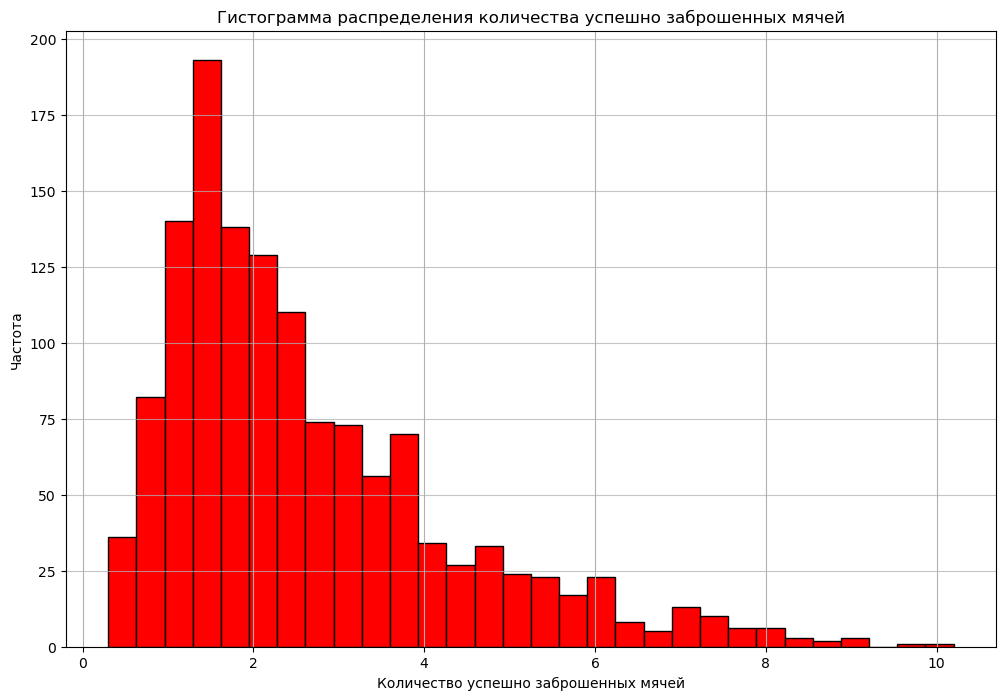

In [26]:
plt.figure(figsize=(12, 8))
df['FGM'].hist(bins=30, edgecolor='black', alpha=1, color='red')
plt.title('Гистограмма распределения количества успешно заброшенных мячей')
plt.xlabel('Количество успешно заброшенных мячей')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Матрица гистограмм всех числовых признаков. 
Представляет собой совокупность гистограмм для всех числовых переменных в наборе данных

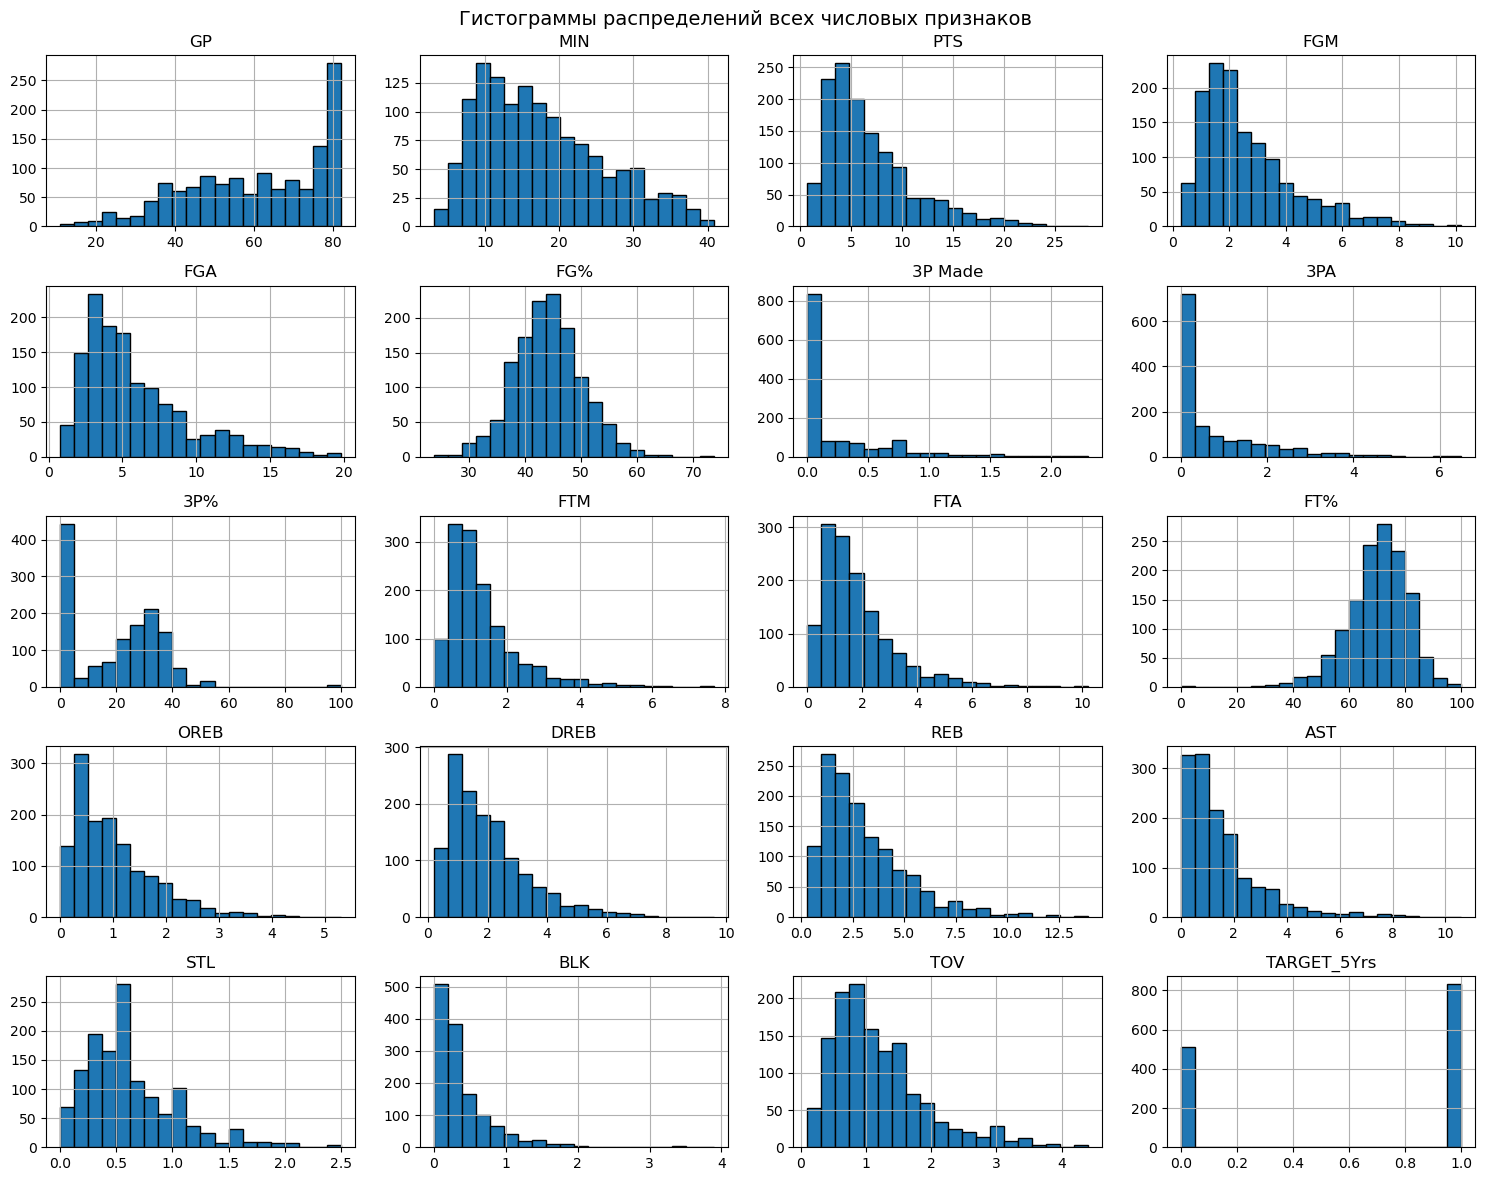

In [15]:
numeric_col = df.select_dtypes(include=[np.number]).columns
df[numeric_col].hist(figsize=(15, 12), bins=20, edgecolor='black', alpha=1)
plt.suptitle('Гистограммы распределений всех числовых признаков', fontsize=14)
plt.tight_layout()
plt.show()

Ящик с усами для  количества успешно заброшенных мячей(FGM).
Отображает основные статистические характеристики распределения: медиану, квартили и выбросы. Выбросы, отображаемые точками, не наблюдаются.

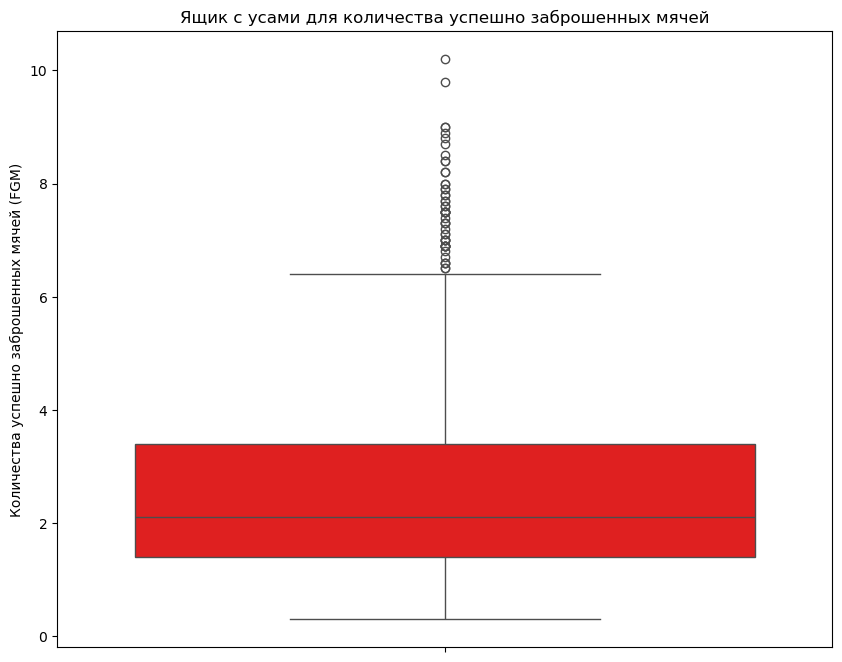

In [30]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='FGM', color='red')
plt.title('Ящик с усами для количества успешно заброшенных мячей')
plt.ylabel('Количества успешно заброшенных мячей (FGM)')
plt.show()

Матрица ящиков с усами для всех числовых признаков Обеспечивает сравнительный анализ распределений всех числовых переменных. Выбросы, отображаемые точками, наблюдаются для p1 (Номинальная мощность узла-поставщика)

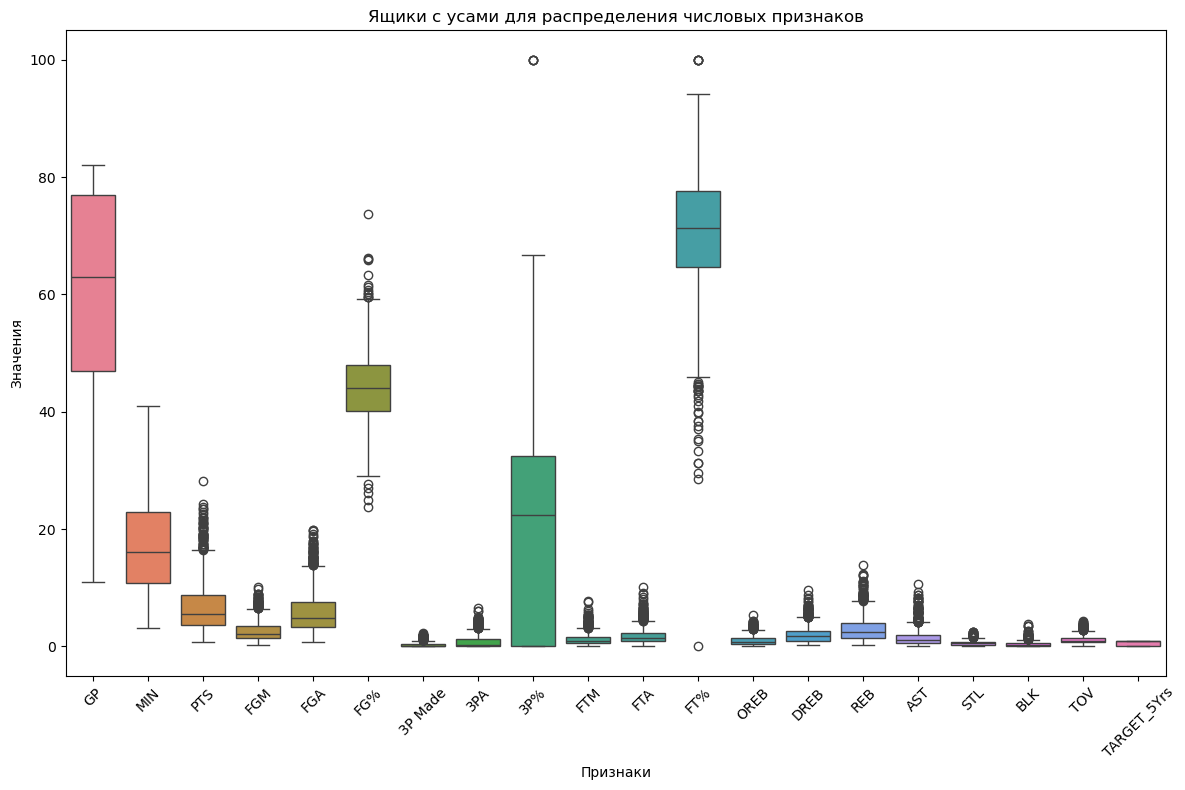

In [32]:
plt.figure(figsize=(12, 8))
numeric_data = df.select_dtypes(include=[np.number])
sns.boxplot(data=numeric_data)
plt.title('Ящики с усами для распределения числовых признаков')
plt.xlabel('Признаки')
plt.ylabel('Значения')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Визуализация категориальных признаков 

Диаграмма распределения игроков с опытом игры 5+- лет. Столбчатая диаграмма отображает частоту встречаемости игроков со стажем больше или меньше 5-ти лет. "0" (меньше) и "1" (больше). Перевес в сторону игроков со стажем 5+лет.

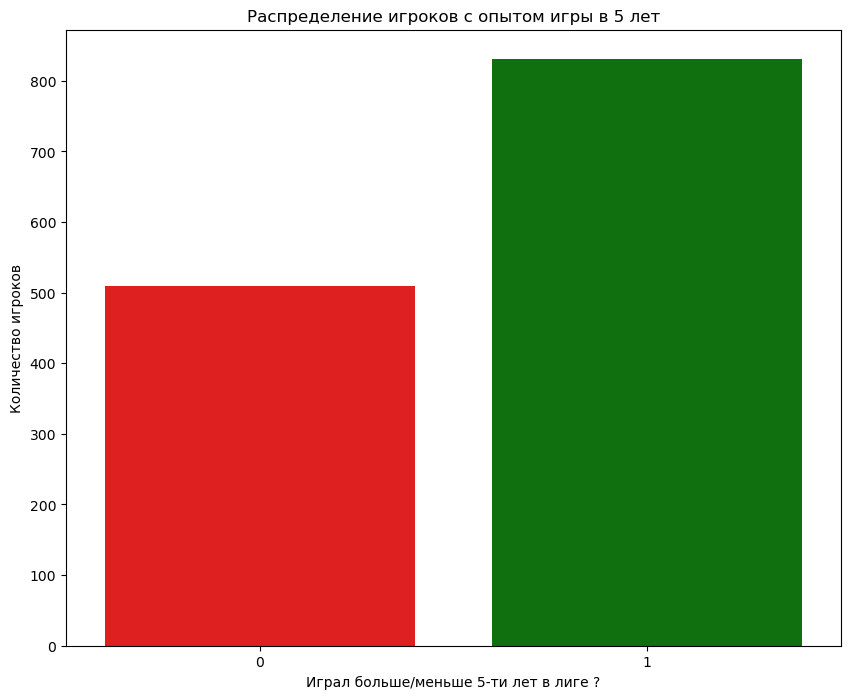

In [36]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='TARGET_5Yrs', hue='TARGET_5Yrs', palette=['red', 'green'], legend=False)
plt.title('Распределение игроков с опытом игры в 5 лет')
plt.xlabel('Играл больше/меньше 5-ти лет в лиге ?')
plt.ylabel('Количество игроков')
plt.show()

Столбчатая диаграмма отображает пять игроков с наибольшим количеством набранных очков в датасете. На графике представлены конкретные значения результативности для каждого из топ-5 бомбардиров, позволяя визуально сравнить их показатели.

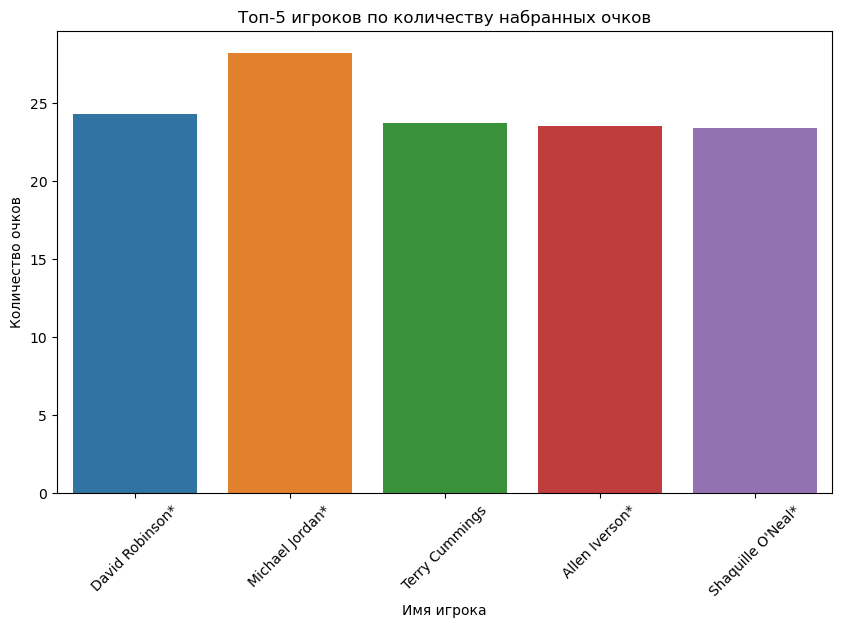

In [46]:

top_scorers = df.nlargest(5, 'PTS')['Name'].values

top_df = df[df['Name'].isin(top_scorers)]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_df, x='Name', y='PTS', hue='Name', legend=False)
plt.title('Топ-5 игроков по количеству набранных очков')
plt.xlabel('Имя игрока')
plt.ylabel('Количество очков')
plt.xticks(rotation=45)
plt.show()

## 6. Визуализация взаимосвязанных признаков

Сравнительный анализ распределений ключевых баскетбольных показателей по продолжительности карьеры. Представляет три параллельных графика 'ящик с усами', позволяющих сравнить распределения количества очков, передач и подборов между игроками, чья карьера превышает 5 лет, и теми, у кого стаж меньше.

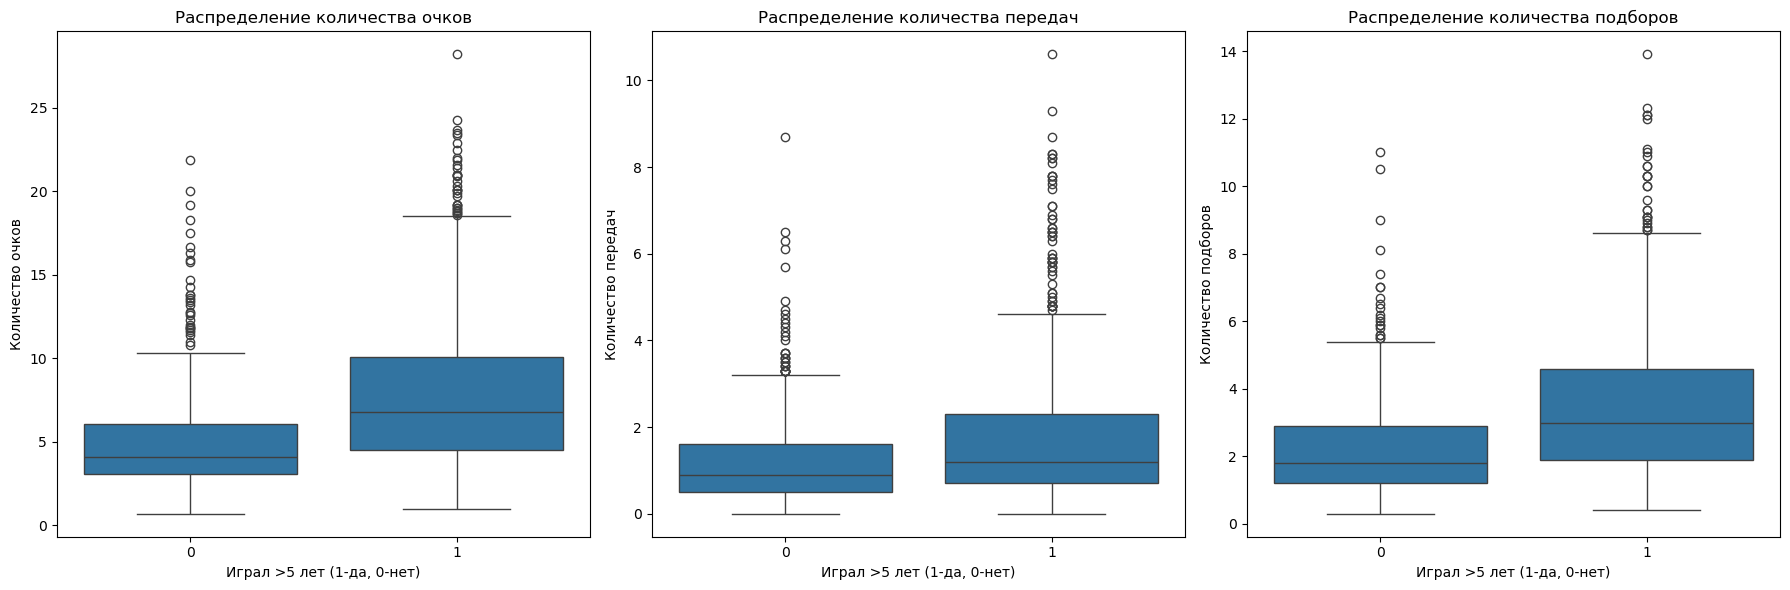

In [49]:
# Создаем subplot с тремя boxplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Распределение очков
sns.boxplot(data=df, x='TARGET_5Yrs', y='PTS', ax=axes[0])
axes[0].set_title('Распределение количества очков')
axes[0].set_xlabel('Играл >5 лет (1-да, 0-нет)')
axes[0].set_ylabel('Количество очков')

# 2. Распределение передач
sns.boxplot(data=df, x='TARGET_5Yrs', y='AST', ax=axes[1])
axes[1].set_title('Распределение количества передач')
axes[1].set_xlabel('Играл >5 лет (1-да, 0-нет)')
axes[1].set_ylabel('Количество передач')

# 3. Распределение подборов
sns.boxplot(data=df, x='TARGET_5Yrs', y='REB', ax=axes[2])
axes[2].set_title('Распределение количества подборов')
axes[2].set_xlabel('Играл >5 лет (1-да, 0-нет)')
axes[2].set_ylabel('Количество подборов')

plt.tight_layout()
plt.show()

Матрица попарных распределений ключевых баскетбольных показателей. Создает сетку графиков, где на диагонали расположены гистограммы распределений отдельных признаков, а на пересечениях - точечные диаграммы попарных зависимостей. Цвет точек указывает на продолжительность карьеры игрока.

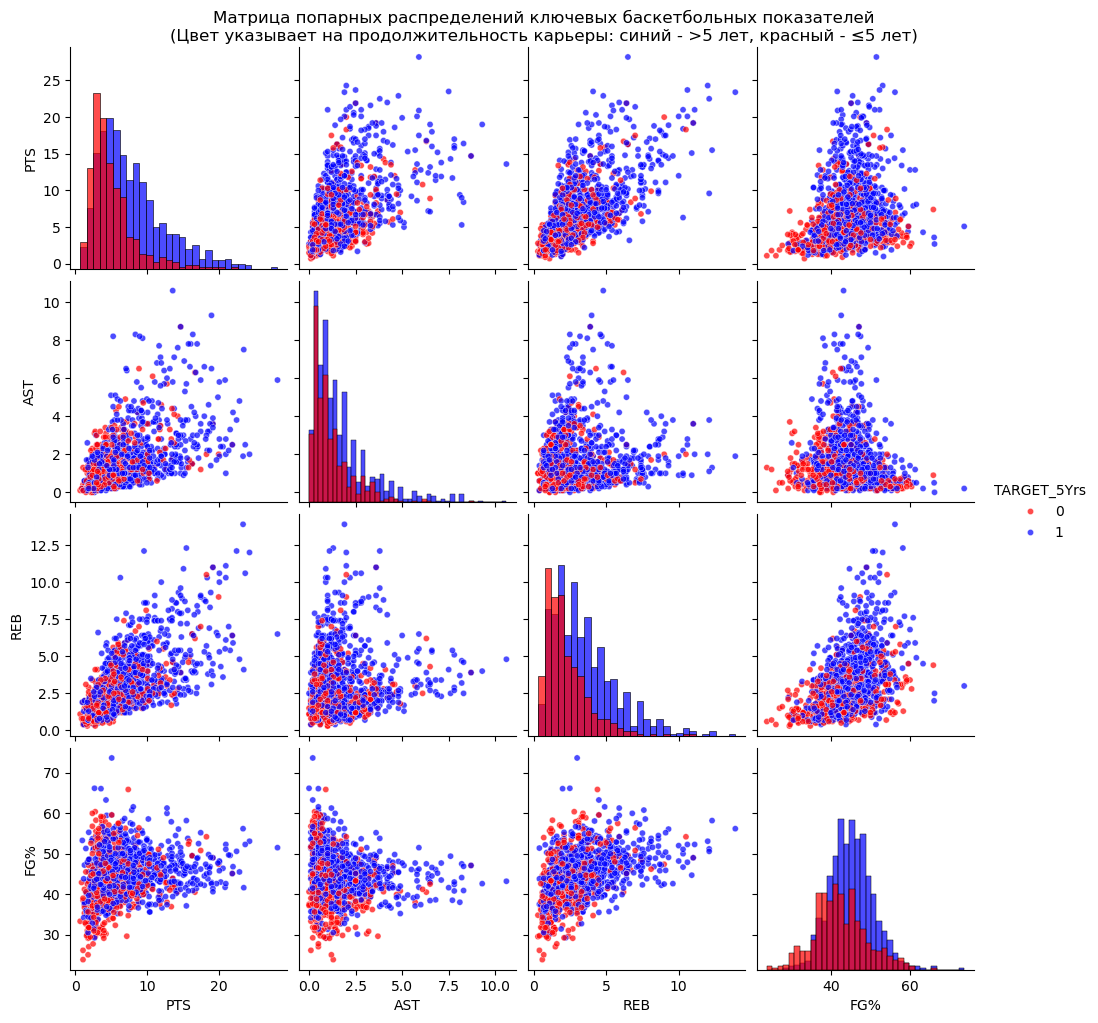

In [50]:
# Выбираем ключевые признаки для анализа
key_features = ['PTS', 'AST', 'REB', 'FG%']

# Строим матрицу попарных распределений
sns.pairplot(df[key_features + ['TARGET_5Yrs']], 
             hue='TARGET_5Yrs',
             diag_kind='hist',
             palette={0: 'red', 1: 'blue'},
             plot_kws={'alpha': 0.7, 's': 20},
             diag_kws={'alpha': 0.7})
plt.suptitle('Матрица попарных распределений ключевых баскетбольных показателей\n(Цвет указывает на продолжительность карьеры: синий - >5 лет, красный - ≤5 лет)', 
             y=1.02)
plt.show()

Анализ взаимосвязи количества очков и процента попаданий с игры. Исследует зависимость между общей результативностью и эффективностью бросковой подготовки игроков. Цвет точек указывает на продолжительность карьеры.

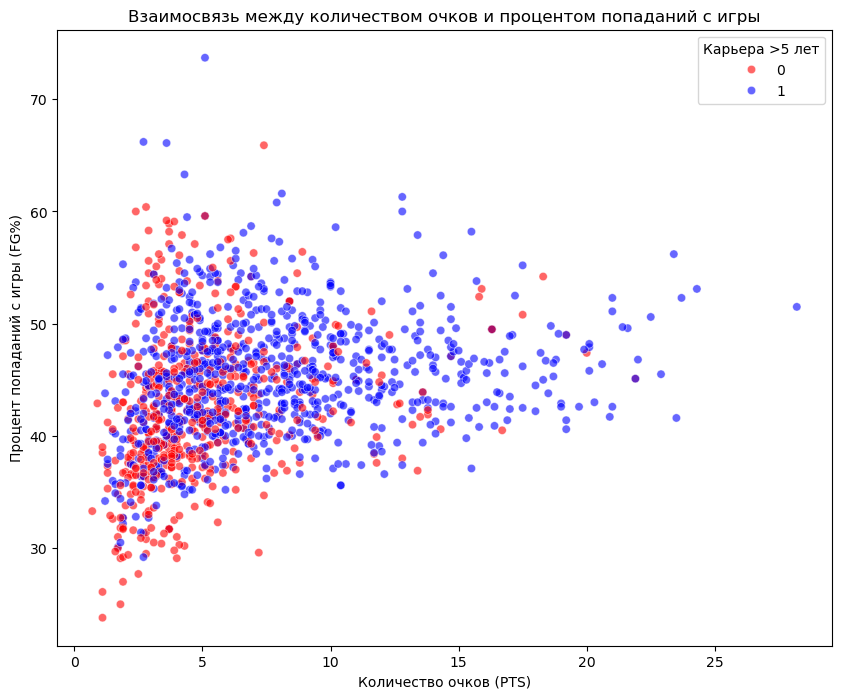

In [54]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PTS', y='FG%', hue='TARGET_5Yrs',
                palette={0: 'red', 1: 'blue'}, alpha=0.6)
plt.title('Взаимосвязь между количеством очков и процентом попаданий с игры')
plt.xlabel('Количество очков (PTS)')
plt.ylabel('Процент попаданий с игры (FG%)')
plt.legend(title='Карьера >5 лет')
plt.show()

## 7. Корреляция признаков

Тепловая карта матрицы корреляции признаков Визуализирует попарные корреляции между всеми числовыми признаками набора данных. Цветовая шкала от синего до красного идентифицирует сильные положительные и отрицательные взаимосвязи, а числовые аннотации предоставляют точные значения коэффициентов корреляции Пирсона для количественной оценки зависимостей между параметрами системы.

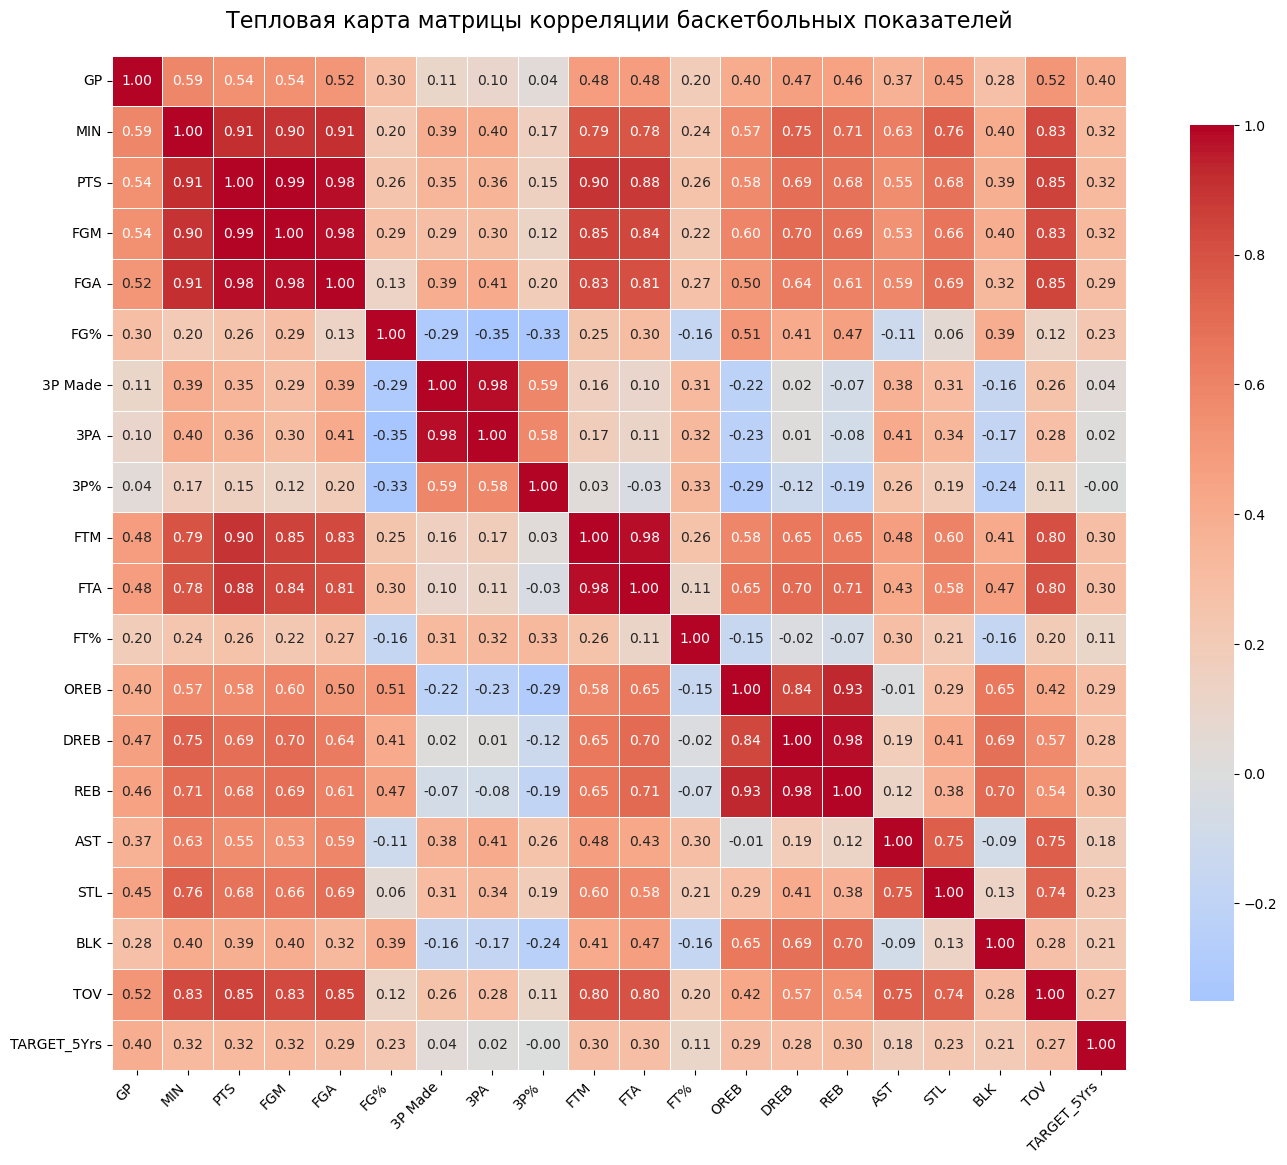

In [55]:
# Создаем копию датафрейма только с числовыми признаками
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 12))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            square=True)

plt.title('Тепловая карта матрицы корреляции баскетбольных показателей', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Анализ корреляции признаков с целевой переменной продолжительности карьеры. Определяет и ранжирует признаки по степени их влияния на длительность выступлений в лиге через вычисление коэффициентов корреляции. Числовой вывод предоставляет количественную оценку значимости каждого параметра, визуализация в виде матрицы ящиков с усами.

Корреляция признаков с продолжительностью карьеры (>5 лет):
GP: 0.397
MIN: 0.318
FGM: 0.318
PTS: 0.316
REB: 0.299
FTM: 0.297
FTA: 0.296
OREB: 0.293
FGA: 0.293
DREB: 0.285
TOV: 0.272
STL: 0.230
FG%: 0.227
BLK: 0.210
AST: 0.175
FT%: 0.107
3P Made: 0.037
3PA: 0.018
3P%: -0.003


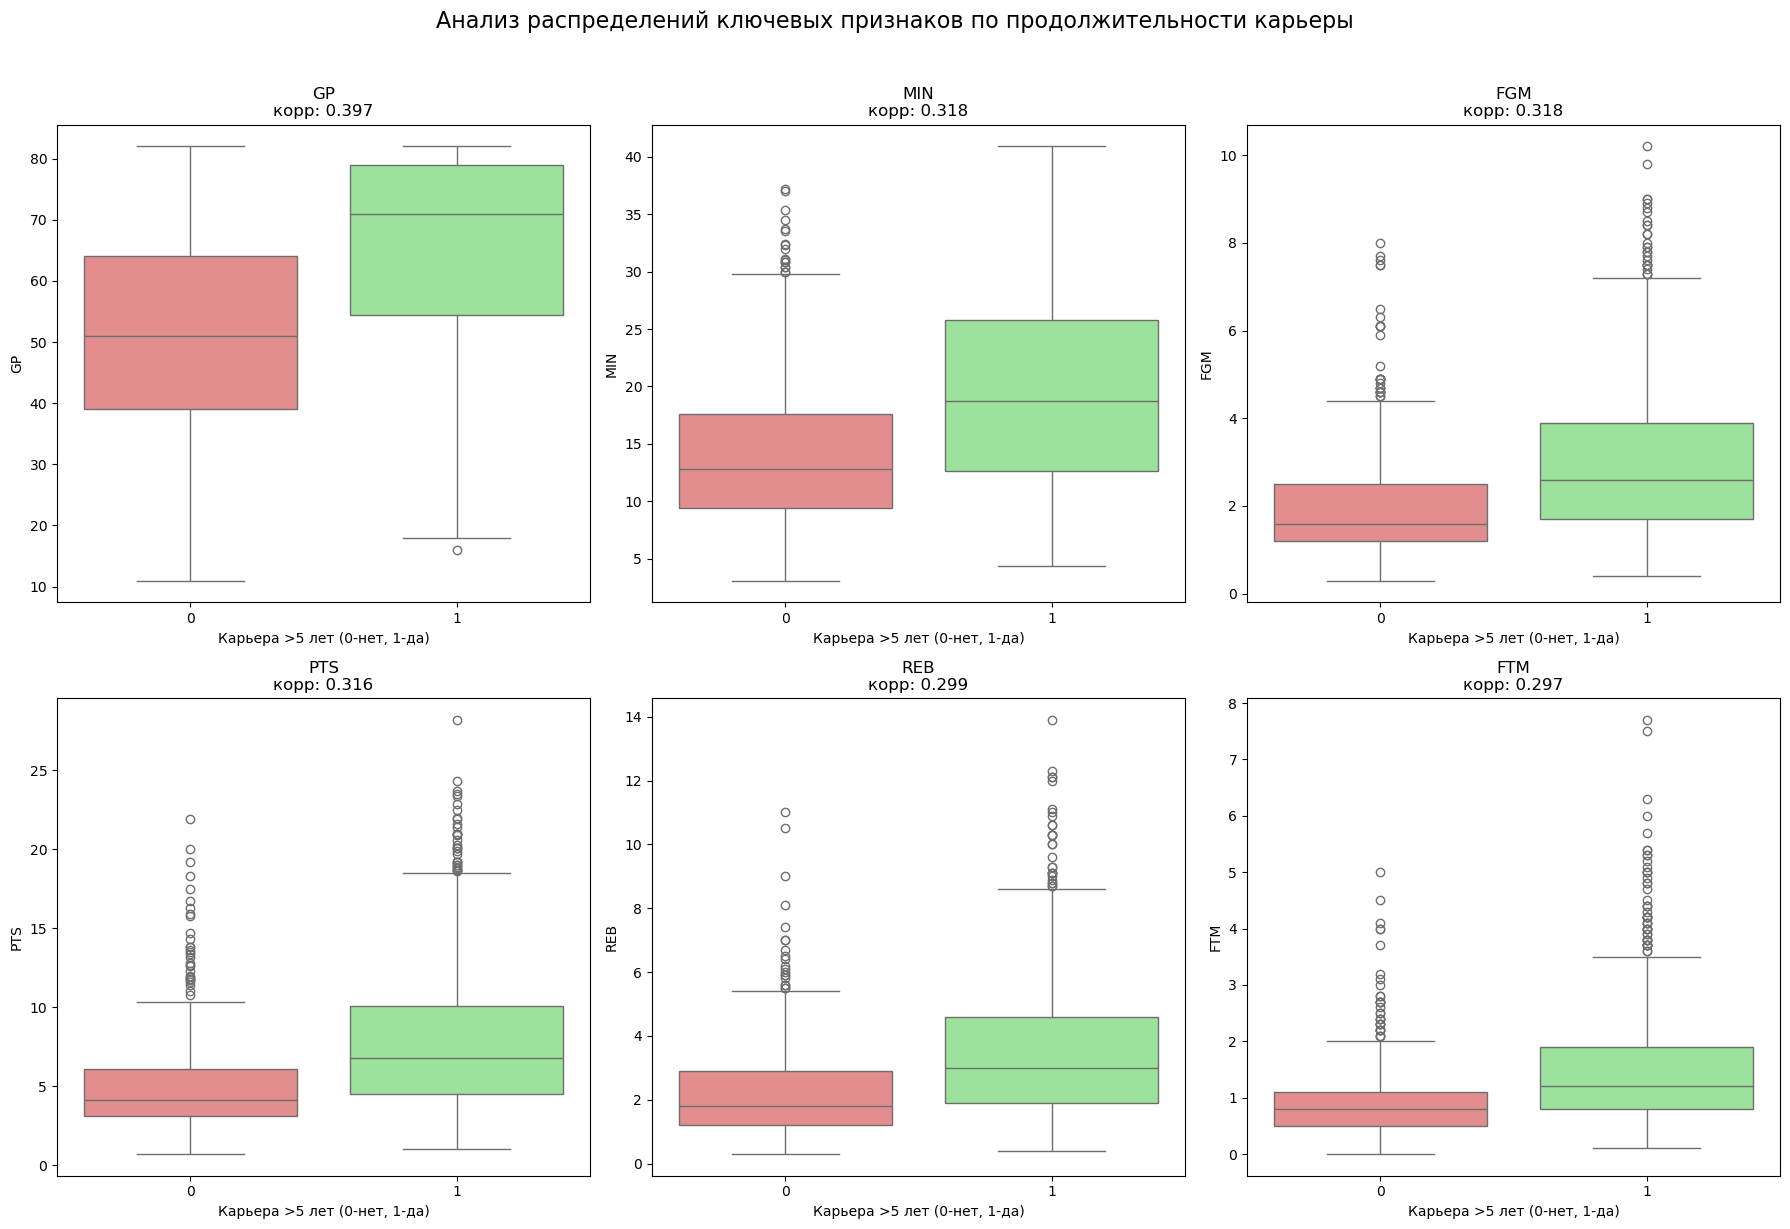

In [56]:
# Создаем копию датафрейма только с числовыми признаками
df_numeric = df.select_dtypes(include=[np.number])

# Вычисляем корреляцию с целевой переменной
correlation_with_target = df_numeric.corr()['TARGET_5Yrs'].sort_values(ascending=False)

print("Корреляция признаков с продолжительностью карьеры (>5 лет):")
print("=" * 60)
for feature, corr in correlation_with_target.items():
    if feature != 'TARGET_5Yrs':
        print(f"{feature}: {corr:.3f}")

# Выбираем топ-6 признаков по корреляции (исключая саму целевую переменную)
top_features = correlation_with_target[1:7].index

# Создаем матрицу boxplot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    sns.boxplot(data=df, x='TARGET_5Yrs', y=feature, hue='TARGET_5Yrs', ax=axes[i],
                palette={0: 'lightcoral', 1: 'lightgreen'},
                legend=False)
    
    axes[i].set_title(f'{feature}\nкорр: {correlation_with_target[feature]:.3f}')
    axes[i].set_xlabel('Карьера >5 лет (0-нет, 1-да)')
    axes[i].set_ylabel(feature)

plt.suptitle('Анализ распределений ключевых признаков по продолжительности карьеры', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()